In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Base de données AirPassengers.csv kaggle
df = pd.read_csv('sample_data/AirPassengers.csv')

In [ ]:
# On prédit seulement la colonne #Passengers
X =  np.array(df.iloc[:,1])
X = X.reshape((X.shape[0],1))

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
sc = sc.fit(X)
X_scaled = sc.transform(X)

In [ ]:
X_scaled

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [ ]:
# On crée deux matrices X et y qui pour chaque X donne le nombre pour le mois précédent

X = []
y = []
look_back = 1 # Nombre de mois, ici par 1 mois
for i in range(len(X_scaled)-1):
  X.append(X_scaled[i:(i+look_back),0])
  y.append(X_scaled[i+look_back, 0])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0],1))
y = y.reshape((y.shape[0],1))

In [ ]:
X.shape

(143, 1)

In [ ]:
y.shape

(143, 1)

In [ ]:
# Mettre X sur 3 dim
X = X.reshape((X.shape[0],X.shape[1], 1))

In [ ]:
X

array([[[0.01544402]],

       [[0.02702703]],

       [[0.05405405]],

       [[0.04826255]],

       [[0.03281853]],

       [[0.05984556]],

       [[0.08494208]],

       [[0.08494208]],

       [[0.06177606]],

       [[0.02895753]],

       [[0.        ]],

       [[0.02702703]],

       [[0.02123552]],

       [[0.04247104]],

       [[0.07142857]],

       [[0.05984556]],

       [[0.04054054]],

       [[0.08687259]],

       [[0.12741313]],

       [[0.12741313]],

       [[0.1042471 ]],

       [[0.05598456]],

       [[0.01930502]],

       [[0.06949807]],

       [[0.07915058]],

       [[0.08880309]],

       [[0.14285714]],

       [[0.11389961]],

       [[0.13127413]],

       [[0.14285714]],

       [[0.18339768]],

       [[0.18339768]],

       [[0.15444015]],

       [[0.11196911]],

       [[0.08108108]],

       [[0.11969112]],

       [[0.12934363]],

       [[0.14671815]],

       [[0.17181467]],

       [[0.14864865]],

       [[0.15250965]],

       [[0.22007

In [ ]:
# train test 
train_size = int(len(X)*0.7)
X_train = X[:train_size, :]
X_test = X[train_size:, :]
y_train = y[:train_size, 0]
y_test = y[train_size:, 0]

In [ ]:
X_train.shape

(100, 1, 1)

In [ ]:
X_test.shape

(43, 1, 1)

In [ ]:
y_train.shape

(100, 1)

In [ ]:
y_test.shape

(43, 1)

In [ ]:
y_train, y_test = y_train.reshape((y_train.shape[0], 1)), y_test.reshape((y_test.shape[0], 1))

In [ ]:
# Construire le RNN
model = tf.keras.models.Sequential()
# return_sequences : Pour dire que y'aura d'autres couches de LSTM
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(1,1)))
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dense(units=1))
model.compile(optimizer='adam', loss="mse", metrics=['mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 6s 712ms/step - loss: 0.0442 - mse: 0.0442 - val_loss: 0.1718 - val_mse: 0.1718
Epoch 2/50
3/3 [==============================] - 0s 26ms/step - loss: 0.0407 - mse: 0.0407 - val_loss: 0.1619 - val_mse: 0.1619
Epoch 3/50
3/3 [==============================] - 0s 27ms/step - loss: 0.0403 - mse: 0.0403 - val_loss: 0.1518 - val_mse: 0.1518
Epoch 4/50
3/3 [==============================] - 0s 28ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.1411 - val_mse: 0.1411
Epoch 5/50
3/3 [==============================] - 0s 29ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.1297 - val_mse: 0.1297
Epoch 6/50
3/3 [==============================] - 0s 28ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.1177 - val_mse: 0.1177
Epoch 7/50
3/3 [==============================] - 0s 28ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.1050 - val_mse: 0.1050
Epoch 8/50
3/3 [==============================] - 0s 31ms/step - loss: 0.0202 - mse: 0.0202 - va

In [ ]:
y_pred = model.predict(X_test)

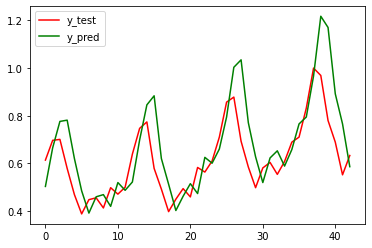

In [ ]:
plt.plot(y_test, c='red', label='y_test')
plt.plot(y_pred, c='green', label='y_pred')
plt.legend()
plt.show()

In [ ]:
sc.inverse_transform(y_pred)

array([[364.72662],
       [448.67725],
       [506.10776],
       [508.84183],
       [425.43857],
       [355.18002],
       [306.7975 ],
       [342.22498],
       [346.91284],
       [321.45847],
       [373.1653 ],
       [356.36765],
       [374.37735],
       [465.76077],
       [542.0642 ],
       [561.7833 ],
       [425.43857],
       [369.53897],
       [312.4027 ],
       [343.3945 ],
       [370.74615],
       [349.26666],
       [427.9964 ],
       [415.26862],
       [446.07114],
       [515.70074],
       [623.7851 ],
       [639.9665 ],
       [503.379  ],
       [429.27768],
       [373.16534],
       [426.7167 ],
       [442.17313],
       [408.96265],
       [444.7703 ],
       [500.65576],
       [515.70074],
       [604.82355],
       [734.752  ],
       [710.3727 ],
       [566.04004],
       [500.65576],
       [407.70612]], dtype=float32)

In [ ]:
sc.inverse_transform(y_test)

array([[422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.],
       [432.]])

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step
